# Шаг0: Импорт библиотек

In [23]:
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, accuracy_score

# Шаг 1: Загрузка данных

In [24]:
iris_data = np.genfromtxt('/workspaces/spbu-python-course/project/iris/iris.csv', delimiter=',', dtype=str, skip_header=1)

# Шаг 2: Представление данных в виде массивов

Признаки в матрице (n, 4)

In [25]:
features = np.array([[float(value.replace('"', '').strip()) for value in row[:-1]] for row in iris_data])

Названия видов в векторе размера n

In [26]:
labels = np.array([row[-1] for row in iris_data])

# Шаг 3: Вывод размера массивов

In [27]:
features_shape = features.shape  # Размерность матрицы признаков
labels_shape = labels.shape  # Размер вектора названий видов

Определим, сколько места занимают массивы

In [28]:
features_size = features.nbytes  # размер матрицы (в байтах)
labels_size = labels.nbytes # размер вектора (в байтах)

# Шаг 4: Вывод результатов 

In [29]:
print("Размер матрицы признаков (n, 4):", features_shape)
print("Размер вектора названий видов (n,):", labels_shape)
print("Размер матрицы признаков в байтах:", features_size)
print("Размер вектора названий видов в байтах:", labels_size)

Размер матрицы признаков (n, 4): (150, 4)
Размер вектора названий видов (n,): (150,)
Размер матрицы признаков в байтах: 4800
Размер вектора названий видов в байтах: 7200


# Шаг 5: Нормализация данных на промежуток от 0 до 1

In [30]:
features_min = features.min(axis=0)  # Минимальные значения для каждой колонки
features_max = features.max(axis=0)  # Максимальные значения для каждой колонки

Нормализуем данные

In [31]:
features_normalized = (features - features_min) / (features_max - features_min)

Проверка результатов. Размеры после нормализации

In [32]:
print("Нормализованные данные:")
print(features_normalized)

Нормализованные данные:
[[0.22222222 0.625      0.06779661 0.04166667]
 [0.16666667 0.41666667 0.06779661 0.04166667]
 [0.11111111 0.5        0.05084746 0.04166667]
 [0.08333333 0.45833333 0.08474576 0.04166667]
 [0.19444444 0.66666667 0.06779661 0.04166667]
 [0.30555556 0.79166667 0.11864407 0.125     ]
 [0.08333333 0.58333333 0.06779661 0.08333333]
 [0.19444444 0.58333333 0.08474576 0.04166667]
 [0.02777778 0.375      0.06779661 0.04166667]
 [0.16666667 0.45833333 0.08474576 0.        ]
 [0.30555556 0.70833333 0.08474576 0.04166667]
 [0.13888889 0.58333333 0.10169492 0.04166667]
 [0.13888889 0.41666667 0.06779661 0.        ]
 [0.         0.41666667 0.01694915 0.        ]
 [0.41666667 0.83333333 0.03389831 0.04166667]
 [0.38888889 1.         0.08474576 0.125     ]
 [0.30555556 0.79166667 0.05084746 0.125     ]
 [0.22222222 0.625      0.06779661 0.08333333]
 [0.38888889 0.75       0.11864407 0.08333333]
 [0.22222222 0.75       0.08474576 0.08333333]
 [0.30555556 0.58333333 0.11864407 0

In [33]:
print("Размер нормализованной матрицы признаков:", features_normalized.shape)

Размер нормализованной матрицы признаков: (150, 4)


# Шаг 6: Выбор признака для категоризации

In [34]:
sepal_length = features_normalized[:, 0]  

# Шаг 7: Рассчет квантилей

In [35]:
q1 = np.quantile(sepal_length, 0.25)  # 25-й процентиль
q3 = np.quantile(sepal_length, 0.75)  # 75-й процентиль

# Шаг 8: Определение категориальной переменной

In [36]:
def categorize(value):
    if value < q1:
        return 'small'
    elif q1 <= value <= q3:
        return 'medium'
    else:
        return 'big'

Применение функции к выбранному признаку

In [37]:
categories = np.array([categorize(value) for value in sepal_length])

Добавление категориальной переменной в DataFrame

In [38]:
categorical_data = np.column_stack((features_normalized, categories))

Проверка результатов (Опционально, можно вывести количество образцов в каждой категории)

In [39]:
print("Первые несколько строк с добавленной категориальной переменной:")
for i in range(5):
    print("Sepal Length:", categorical_data[i,-2], "Category:", categorical_data[i,-1])

Первые несколько строк с добавленной категориальной переменной:
Sepal Length: 0.04166666666666667 Category: medium
Sepal Length: 0.04166666666666667 Category: small
Sepal Length: 0.04166666666666667 Category: small
Sepal Length: 0.04166666666666667 Category: small
Sepal Length: 0.04166666666666667 Category: small


Подсчет количества образцов в каждой категории


In [40]:
unique, counts = np.unique(categories, return_counts=True)
categories_counts = dict(zip(unique, counts))
print("\nКоличество образцов в каждой категории:")
print(categories_counts)


Количество образцов в каждой категории:
{np.str_('big'): np.int64(35), np.str_('medium'): np.int64(83), np.str_('small'): np.int64(32)}


# Шаг 9: Разделение датасета на признаки и целевую переменную

In [41]:
unique_labels = np.unique(labels)
label_to_id = {label: idx for idx, label in enumerate(unique_labels)}
labels_encoded = np.array([label_to_id[label] for label in labels])

In [42]:
feature_to_categorize = features_normalized[:, 0]
categories = np.where(feature_to_categorize < 0.25, 'small',
                      np.where(feature_to_categorize > 0.75, 'big', 'medium'))

print("Категории по первому признаку:", categories)

Категории по первому признаку: ['small' 'small' 'small' 'small' 'small' 'medium' 'small' 'small' 'small'
 'small' 'medium' 'small' 'small' 'small' 'medium' 'medium' 'medium'
 'small' 'medium' 'small' 'medium' 'small' 'small' 'small' 'small' 'small'
 'small' 'medium' 'medium' 'small' 'small' 'medium' 'medium' 'medium'
 'small' 'small' 'medium' 'small' 'small' 'small' 'small' 'small' 'small'
 'small' 'small' 'small' 'small' 'small' 'medium' 'small' 'medium'
 'medium' 'medium' 'medium' 'medium' 'medium' 'medium' 'small' 'medium'
 'medium' 'small' 'medium' 'medium' 'medium' 'medium' 'medium' 'medium'
 'medium' 'medium' 'medium' 'medium' 'medium' 'medium' 'medium' 'medium'
 'medium' 'medium' 'medium' 'medium' 'medium' 'medium' 'medium' 'medium'
 'medium' 'medium' 'medium' 'medium' 'medium' 'medium' 'medium' 'medium'
 'medium' 'medium' 'small' 'medium' 'medium' 'medium' 'medium' 'small'
 'medium' 'medium' 'medium' 'big' 'medium' 'medium' 'big' 'small' 'big'
 'medium' 'big' 'medium' 'medium' 

# Шаг 10: Разделение на выборки (80% для обучающей и 20% для тестовой)


In [43]:
x_train, x_test, y_train, y_test = train_test_split(features_normalized, labels_encoded, test_size=0.2, random_state=42)

# Шаг 11: Проверка размерностей полученных выборок

In [44]:
print("Размер обучающей выборки x_train:", x_train.shape)
print("Размер тестовой выборки x_test:", x_test.shape)
print("Размер обучающей выборки y_train:", y_train.shape)
print("Размер тестовой выборки y_test:", y_test.shape)

Размер обучающей выборки x_train: (120, 4)
Размер тестовой выборки x_test: (30, 4)
Размер обучающей выборки y_train: (120,)
Размер тестовой выборки y_test: (30,)


# Шаг 12: Функция для обучения и оценки модели. Обучение модели. Предсказания. Оценка результатов

In [45]:
def train_and_evaluate(x_train, x_test, y_train, y_test, kernel='linear', C=1.0):
    model = SVC(kernel=kernel, C=C)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    return accuracy, report, model, y_pred
results = []

# Шаг 13: Проведение трех экспериментов

Эксперимент 1: Обычные данные

In [46]:
accuracy1, report1, model1, y_pred1 = train_and_evaluate(x_train, x_test, y_train, y_test, kernel='linear', C=1.0)
results.append((accuracy1, report1, y_pred1))
print("\nЭксперимент 1: Линейное ядро")
print("Точность:", accuracy1)
print(report1)


Эксперимент 1: Линейное ядро
Точность: 1.0
{'0': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 10.0}, '1': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 9.0}, '2': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 11.0}, 'accuracy': 1.0, 'macro avg': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 30.0}, 'weighted avg': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 30.0}}


Эксперимент 2: Нормализованные данные

In [47]:
accuracy2, report2, model2, y_pred2 = train_and_evaluate(x_train, x_test, y_train, y_test, kernel='rbf', C=1.0)
results.append((accuracy2, report2, y_pred2))
print("\nЭксперимент 2: RBF ядро")
print("Точность:", accuracy2)
print(report2)


Эксперимент 2: RBF ядро
Точность: 1.0
{'0': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 10.0}, '1': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 9.0}, '2': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 11.0}, 'accuracy': 1.0, 'macro avg': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 30.0}, 'weighted avg': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 30.0}}


Эксперимент 3: Нормализованные данные с измененным гиперпараметром C

In [48]:
accuracy3, report3, model3, y_pred3 = train_and_evaluate(x_train, x_test, y_train, y_test, kernel='rbf', C=10.0)
results.append((accuracy3, report3, y_pred3))
print("\nЭксперимент 3: RBF ядро, C=10.0")
print("Точность:", accuracy3)
print(report3)


Эксперимент 3: RBF ядро, C=10.0
Точность: 0.9666666666666667
{'0': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 10.0}, '1': {'precision': 1.0, 'recall': 0.8888888888888888, 'f1-score': 0.9411764705882353, 'support': 9.0}, '2': {'precision': 0.9166666666666666, 'recall': 1.0, 'f1-score': 0.9565217391304348, 'support': 11.0}, 'accuracy': 0.9666666666666667, 'macro avg': {'precision': 0.9722222222222222, 'recall': 0.9629629629629629, 'f1-score': 0.9658994032395567, 'support': 30.0}, 'weighted avg': {'precision': 0.9694444444444444, 'recall': 0.9666666666666667, 'f1-score': 0.9664109121909632, 'support': 30.0}}


Визуализация точности экспериментов

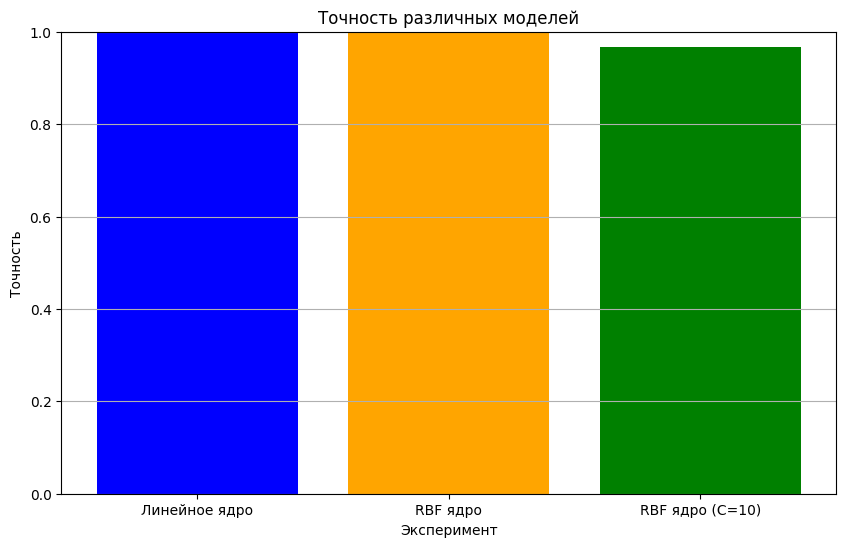

In [49]:
accuracies = [result[0] for result in results]
experiment_labels = ['Линейное ядро', 'RBF ядро', 'RBF ядро (C=10)']

plt.figure(figsize=(10, 6))
plt.bar(experiment_labels, accuracies, color=['blue', 'orange', 'green'])
plt.ylim([0, 1])
plt.title('Точность различных моделей')
plt.xlabel('Эксперимент')
plt.ylabel('Точность')
plt.grid(axis='y')
plt.show()

In [50]:
print("\nВыводы по проведенным экспериментам:")


Выводы по проведенным экспериментам:


1. В первом эксперименте с линейным ядром мы наблюдаем за его эффективностью. 
Если точность ниже, это может указывать на то, что линейная модель не может хорошо 
различать классы, так как данные могут быть нелинейно разделимыми.
2. Во втором эксперименте с RBF ядром мы видим улучшение точности. 
Это происходит из-за способности RBF ядра справляться с более сложными, 
нелинейными границами классов. Чем выше точность, тем лучше модель классифицирует виды ирисов.
3. В третьем эксперименте с увеличенным значением параметра C позволило модели RBF достичь ещё большей точности, что указывает на улучшенное соответствие модели обучающим данным. 

# Шаг 14: Визуализация данных с уменьшением размерности

In [51]:
def visualize_data(x, y, title):
    pca = PCA(n_components=2)
    x_reduced = pca.fit_transform(x)
    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(x_reduced[:, 0], x_reduced[:, 1], c=y, cmap='viridis')
    plt.title(title)
    plt.xlabel('Первая компонента PCA')
    plt.ylabel('Вторая компонента PCA')
    plt.colorbar(scatter, ticks=[0, 1, 2], label='Тип ириса')
    plt.clim(-0.5, 2.5)
    plt.xticks()
    plt.yticks()
    plt.grid()
    plt.show()


Визуализация оригинальных данныхю. Визуализация предсказанных данных. 

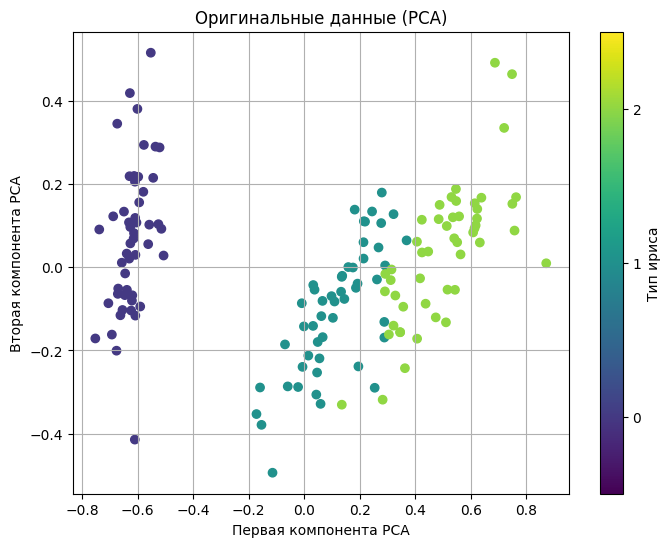

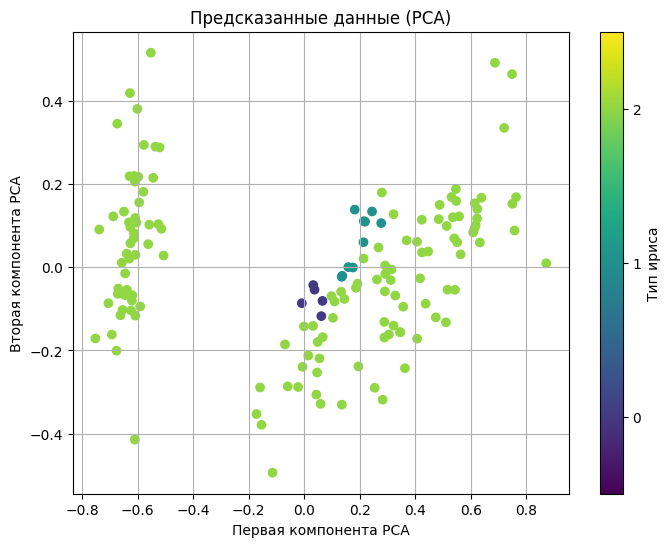

In [52]:
visualize_data(features_normalized, labels_encoded, "Оригинальные данные (PCA)")
y_pred_final = model3.predict(StandardScaler().fit_transform(features_normalized)) 
visualize_data(features_normalized, y_pred_final, "Предсказанные данные (PCA)")

 Выводы о визуализации:
Первый график показывает оригинальные данные, отобранные по обучающим данным, и классифицирует их по цветам согласно классу. Это позволяет увидеть, насколько хорошо различные классы разделяются.
Второй график отображает предсказанные классы ирисов на основе RBF модели. Если классы хорошо различны, это говорит о том, что модель успешно классифицирует различные виды, и она могла указывать на область, где была нестабильность или ошибки. 